### Stage 1: Data Overview and Quality Check

In this stage, we will explore the dataset to understand its structure, contents, and overall quality.  
The main goal is to ensure that the data is clean, consistent, and ready for deeper analytical work.

#### Steps to perform:
1. **Data loading**  
   We will import the dataset into Pandas and verify that all columns are correctly read, including numeric and date types.  
   An SQLite database will also be created for possible SQL-based analysis later.

2. **Initial inspection**  
   We will display the first few rows of the dataset to get a quick understanding of its contents.  
   Then, we will check the dataset dimensions (`shape`) and data types using `info()` to confirm that everything has been properly loaded.

3. **Data validation**  
   We will check for missing values and duplicate rows to confirm that the dataset is clean and reliable.  

4. **Basic categorical overview**  
   We will identify the most frequent values in the main categorical columns (`license`, `model`, `feature`) to understand which licenses, models, and features are most commonly used.

#### Expected outcome:
After completing this stage, we will have:
- a clear understanding of the dataset’s structure and content,  
- confirmation that the data is complete and consistent,  
- and an initial overview of key categorical distributions.


In [1]:
import pandas as pd
data = pd.read_csv('./da_internship_task_dataset.csv')
import sqlite3
conn = sqlite3.connect('jetbrains_activity.db')
data.to_sql('activity', conn, if_exists='replace', index=False)


122746

In [2]:
data.head(5)

,uuid,day_id,license,model,feature,requests_cnt,spent_amount
0,user_920,2025-05-01,Premium,Model_A,Feature_1,44.0,16.38
1,user_717,2025-03-04,Premium,Model_B,Feature_2,72.0,27.92
2,user_610,2025-05-08,Premium,Model_A,Feature_2,27.0,9.87
3,user_94,2025-03-11,Basic,Model_D,Feature_1,76.0,14.67
4,user_920,2025-05-14,Premium,Model_E,Feature_3,47.0,9.88


In [3]:
data.shape


(122746, 7)

In [4]:
data.info

<bound method DataFrame.info of             uuid      day_id     license    model    feature  requests_cnt  \
0       user_920  2025-05-01     Premium  Model_A  Feature_1          44.0   
1       user_717  2025-03-04     Premium  Model_B  Feature_2          72.0   
2       user_610  2025-05-08     Premium  Model_A  Feature_2          27.0   
3        user_94  2025-03-11       Basic  Model_D  Feature_1          76.0   
4       user_920  2025-05-14     Premium  Model_E  Feature_3          47.0   
...          ...         ...         ...      ...        ...           ...   
122741  user_441  2025-05-05  Enterprise  Model_A  Feature_4          58.0   
122742   user_61  2025-04-15    Standard  Model_B  Feature_2          17.0   
122743  user_363  2025-04-14  Enterprise  Model_A  Feature_5          24.0   
122744  user_622  2025-05-05    Standard  Model_A  Feature_3          20.0   
122745   user_45  2025-03-19       Basic  Model_A  Feature_2          10.0   

        spent_amount  
0       

In [5]:
# 
nulls = data.isna().sum().sort_values(ascending=False)
dup_cnt = data.duplicated().sum()
nulls, dup_cnt


(uuid            0
 day_id          0
 license         0
 model           0
 feature         0
 requests_cnt    0
 spent_amount    0
 dtype: int64,
 np.int64(0))

In [6]:
top_license = data['license'].value_counts().head(5)
top_model = data['model'].value_counts().head(5)
top_feature = data['feature'].value_counts().head(5)

print(top_license, top_model, top_feature)


license
Basic         39233
Standard      37368
Enterprise    23516
Premium       22629
Name: count, dtype: int64 model
Model_A    38042
Model_C    24433
Model_D    24423
Model_B    23110
Model_E    12738
Name: count, dtype: int64 feature
Feature_1    45399
Feature_2    36449
Feature_3    26283
Feature_5     7372
Feature_4     7243
Name: count, dtype: int64


In [7]:
#etap 2 
query = ("""select model
from activity
group by model;""")
pd.read_sql_query(query,conn)

,model
0,Model_A
1,Model_B
2,Model_C
3,Model_D
4,Model_E


In [8]:

query = ("""select feature
from activity
group by feature;""")
pd.read_sql_query(query,conn)

,feature
0,Feature_1
1,Feature_2
2,Feature_3
3,Feature_4
4,Feature_5


In [9]:

query = ("""select license
from activity
group by license;""")
pd.read_sql_query(query,conn)

,license
0,Basic
1,Enterprise
2,Premium
3,Standard



From the previous queries, we can identify the following data structure:

- **Models (5 types):** `Model_A`, `Model_B`, `Model_C`, `Model_D`, `Model_E`  
- **Features (5 types):** `Feature_1`, `Feature_2`, `Feature_3`, `Feature_4`, `Feature_5`  
- **Licenses (4 types):** `Basic`, `Standard`, `Premium`, `Enterprise`



In [10]:
#now we count avg and sum, for all type of models(model,feature,license)
df=pd.read_sql_query("""
SELECT 
    model,
    COUNT(*) AS records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity
GROUP BY model""", conn)
df

,model,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Model_A,38042,991933.0,26.074681,365077.08,9.596685,0.3680
1,Model_B,23110,730371.0,31.604111,268166.08,11.603898,0.3672
2,Model_C,24433,1941796.0,79.474318,366621.74,15.005187,0.1888
3,Model_D,24423,1894150.0,77.555992,361607.23,14.806012,0.1909
4,Model_E,12738,733801.0,57.607238,139441.21,10.946868,0.1900


### Model Analysis Summary

The dataset contains **five models**: `Model_A`, `Model_B`, `Model_C`, `Model_D`, and `Model_E`.  
The analysis shows clear differences in usage patterns, activity intensity, and cost per request.

* **Model_C and Model_D** generate the **highest number of requests** (around 1.9 million each) and total spending (around 360,000).  
  Despite being the most used, they also have the **lowest average cost per request (\~0.19)**,  
  making them the **most cost-efficient** models overall.

* **Model_A** appears **most frequently** in the dataset (approximately 38,000 records) but has the **lowest average number of requests per usage (26)**  
  and the **highest cost per request (\~0.37)**.  
  This means that although Model A is used most often, each usage session is **short and relatively expensive**,  
  suggesting it is the **most resource-intensive** model.

* **Models_B and Model_E** show **similar total activity (around 730,000 requests)** but very different usage patterns.  
  `Model_E` appears **half as often** yet generates **more requests per occurrence** and has a **much lower cost per request (0.19 vs 0.37)**.  
  This indicates that the **difference in price explains the difference in usage** —  
  Model B is more expensive and used more frequently but less intensively,  
  while Model E is cheaper and used less often but for longer sessions.

**In summary:**
`Model_A` and `Model B` are the most expensive ones.
`Model_C` and `Model_D` dominate in total usage and cost efficiency.  
`Model_A` is the most common but also the most expensive and least intensive.  
`Model_B` and `Model_E` demonstrate opposite usage dynamics, with cost strongly influencing behavior.


In [11]:
models = df['model']
avg_req = df['avg_req']
avg_cost = df['avg_cost_per_request']

fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(models, avg_req, color='skyblue', label='Average Requests')
ax1.set_ylabel('Average Requests', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(models, avg_cost, color='red', marker='o', linewidth=2, label='Avg Cost per Request')
ax2.set_ylabel('Avg Cost per Request', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Average Requests and Cost per Request by Model')
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [12]:
df=pd.read_sql_query("""
SELECT 
    license,
    COUNT(*) AS records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity
GROUP BY license
""", conn)
df

,license,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Basic,39233,1078123.0,27.480004,256253.86,6.531590,0.2377
1,Enterprise,23516,1925374.0,81.875064,473237.77,20.124076,0.2458
2,Premium,22629,1719628.0,75.992222,403971.50,17.851938,0.2349
3,Standard,37368,1568926.0,41.985817,367450.21,9.833285,0.2342


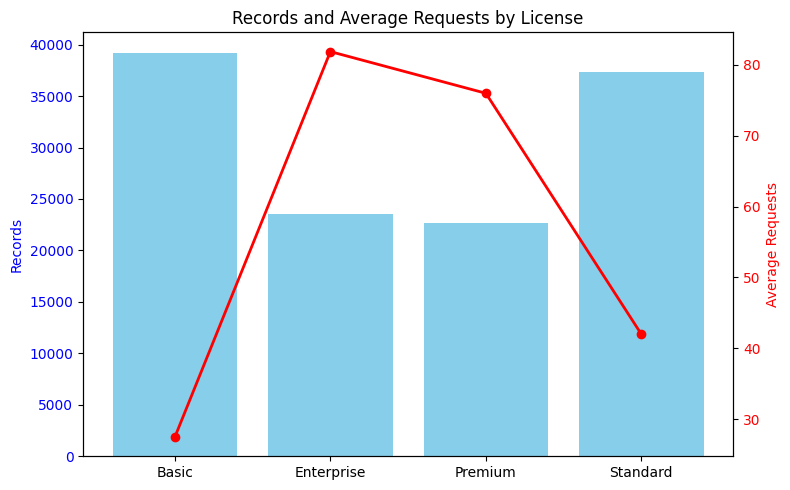

In [13]:
import matplotlib.pyplot as plt



fig, ax1 = plt.subplots(figsize=(8, 5))


ax1.bar(df['license'], df['records'], color='skyblue', label='Records')
ax1.set_ylabel('Records', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2 = ax1.twinx()
ax2.plot(df['license'], df['avg_req'], color='red', marker='o', linewidth=2, label='Average Requests')
ax2.set_ylabel('Average Requests', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Records and Average Requests by License')
plt.tight_layout()
plt.show()


### License Analysis Summary

The dataset includes four license types: `Basic`, `Standard`, `Premium`, and `Enterprise`.  
The analysis reveals that license usage differs mainly in scale and activity, while the cost per request remains almost identical across all license types.

* **Basic** is the **most frequently used license**, slightly more common than `Standard`.  
  However, its **average number of requests per usage (27.5)** is the lowest, indicating that users on the Basic plan perform fewer operations per session.

* **Enterprise**, **Premium**, and **Standard** show **similar total activity levels**, with `sum_req` between 1.5 and 1.9 million requests and total spending between 360K and 470K.  
  However, **Enterprise and Premium licenses dominate in terms of activity intensity**, with the highest `avg_req` values (around 82 and 76 respectively), meaning users on these plans generate more requests per active usage day.

* The **average cost per request (\\~0.23–0.25)** is nearly identical across all license types.  
  This confirms that **the cost per request is independent of the license**, suggesting that the license primarily limits **how many requests a user can make**, rather than changing the unit price.

**In summary:**  
Licenses differ by scale and usage intensity, not by cost per request.  
`Basic` and `Standard` are the most common but less active,  
while `Enterprise` and `Premium` users perform significantly more requests during active usage periods.  
The consistent cost per request indicates a uniform pricing model across all licenses.


In [14]:
df=pd.read_sql_query("""
SELECT 
    feature,
    COUNT(*) AS records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity
GROUP BY feature
""", conn)
df

,feature,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Feature_1,45399,2669779.0,58.807000,610509.16,13.447635,0.2287
1,Feature_2,36449,1756475.0,48.189937,432843.51,11.875319,0.2464
2,Feature_3,26283,1135679.0,43.209641,291964.51,11.108493,0.2571
3,Feature_4,7243,424855.0,58.657324,95352.19,13.164737,0.2244
4,Feature_5,7372,305263.0,41.408437,70243.97,9.528482,0.2301


### Feature Analysis Summary

The dataset contains five features: `Feature_1`, `Feature_2`, `Feature_3`, `Feature_4`, and `Feature_5`.  
The analysis shows that the top three features dominate overall usage, while cost per request remains nearly uniform across all features.

* **Feature_1**, **Feature_2**, and **Feature_3** are the **most frequently used**, together accounting for the vast majority of total requests.  
  For these three, the **average number of requests (avg_req)** is roughly proportional to the number of records,  
  indicating a consistent level of intensity among the most common features.

* The **average cost per request (\~0.22–0.26)** is almost identical across all features,  
  confirming that **pricing is not affected by the feature type**.  
  This reinforces the idea that cost is driven by the model used, rather than by specific functionalities.

* **Feature_4** is the **least used** in terms of total records (only around 7,200),  
  but it shows a **relatively high average number of requests per usage (58.7)** —  
  suggesting that when it is used, it supports **longer or more complex operations**.  
  Despite this intensity, its cost per request remains among the lowest, indicating efficient performance.

* **Feature_5** shows the lowest activity in both total requests and total spending,  
  which could mean it serves a more **specialized or optional role** within the system.

**In summary:**  
Features 1–3 dominate in overall usage and maintain stable request intensity and cost.  
Feature 4, though rarely used, generates a high number of requests per occurrence —  
potentially linked to advanced or resource-heavy functionality.  
Cost per request is consistent across all features, supporting the conclusion that **pricing depends on the model, not the feature itself.**


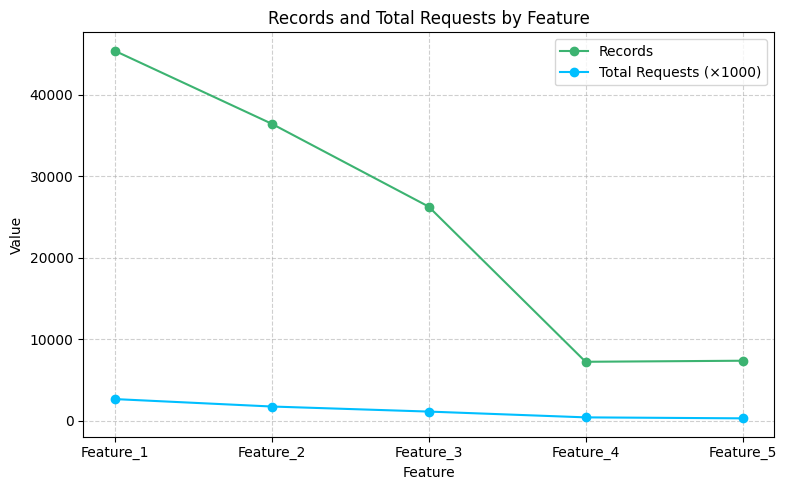

In [15]:


plt.figure(figsize=(8,5))
plt.plot(df['feature'], df['records'], marker='o', label='Records', color='mediumseagreen')
plt.plot(df['feature'], df['sum_req']/1000, marker='o', label='Total Requests (×1000)', color='deepskyblue')

plt.title('Records and Total Requests by Feature')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [16]:
#etap 3 combining categories, for example model+license, model+feature etc. and combining all 3 

In [17]:
pd.read_sql_query("""SELECT 
    model, license,
    COUNT(*) AS records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity

GROUP BY model,license
order by records desc
limit 100""", conn)

,model,license,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Model_A,Basic,12955,181463.0,14.007179,67102.57,5.179666,0.3698
1,Model_A,Standard,11845,242930.0,20.509076,88933.96,7.508144,0.3661
2,Model_D,Basic,8392,333519.0,39.742493,64125.53,7.641269,0.1923
3,Model_C,Basic,8252,366564.0,44.421231,68945.84,8.355046,0.1881
4,Model_D,Standard,7495,606078.0,80.864310,114255.29,15.244201,0.1885
5,Model_B,Standard,7466,158008.0,21.163675,57741.10,7.733874,0.3654
6,Model_A,Enterprise,7197,309526.0,43.007642,113705.54,15.799019,0.3674
7,Model_C,Standard,6916,400846.0,57.959225,75739.86,10.951397,0.1890
8,Model_B,Basic,6452,104788.0,16.241166,38594.92,5.981854,0.3683
9,Model_A,Premium,6045,258014.0,42.682217,95335.01,15.770887,0.3695


### Model + License Combination Summary

The joint analysis of model–license combinations reveals strong consistency in usage patterns across both dimensions.

* **Models C and D** dominate in terms of total requests (`sum_req`) **regardless of license type**.  
  Whether used under Basic, Standard, Premium, or Enterprise plans, these two models consistently generate the highest workload,  
  indicating that they are the system’s most intensively used and functionally central components.

* Conversely, **Basic and Standard licenses** dominate in the number of individual records, **regardless of model**.  
  This means that these lower-tier plans account for the majority of single usage instances,  
  while higher-tier licenses (Enterprise and Premium) are used less often but with much greater activity per record.

* The **average cost per request** remains highly stable within each model family  
  (approximately 0.18–0.19 for Models C/D and around 0.36–0.37 for Models A/B),  
  confirming that **pricing is tied to the model itself rather than to the license type**.

* **Enterprise and Premium combinations** still exhibit the highest `avg_req` and `avg_spent`,  
  reinforcing that these plans correspond to **fewer but more resource-intensive sessions**.

**In summary:**  
Across all combinations, Models C and D remain dominant in total request volume, independent of license.  
At the same time, Basic and Standard licenses lead in usage frequency, independent of model.  
This confirms a clear division between high-frequency, low-intensity usage (Basic/Standard)  
and lower-frequency, high-intensity workloads (Enterprise/Premium),  
with model performance driving the overall system load.


In [18]:
pd.read_sql_query("""SELECT 
    model,feature,
    COUNT(*) AS records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity

GROUP BY model,feature
order by records desc
limit 20""", conn) 

,model,feature,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Model_A,Feature_1,14037,363290.0,25.880886,132156.26,9.414851,0.3638
1,Model_A,Feature_2,11248,295124.0,26.237909,108921.86,9.683665,0.3691
2,Model_C,Feature_1,9052,937253.0,103.540985,174753.50,19.305513,0.1865
3,Model_D,Feature_1,9030,798043.0,88.376855,152775.56,16.918667,0.1914
4,Model_B,Feature_1,8477,241452.0,28.483190,88108.55,10.393836,0.3649
5,Model_A,Feature_3,8235,231346.0,28.093018,86720.72,10.530749,0.3749
6,Model_C,Feature_2,7313,404161.0,55.266101,76716.27,10.490397,0.1898
7,Model_D,Feature_2,7256,603601.0,83.186466,114626.67,15.797501,0.1899
8,Model_B,Feature_2,6846,252778.0,36.923459,94703.35,13.833384,0.3747
9,Model_D,Feature_3,5174,251417.0,48.592385,48922.41,9.455433,0.1946


In [19]:
pd.read_sql_query("""SELECT 
    model,feature,
    COUNT(*) AS records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity

GROUP BY model,feature
order by avg_req desc
limit 20""", conn) 

,model,feature,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Model_C,Feature_4,1405,162050.0,115.338078,31964.58,22.750591,0.1973
1,Model_C,Feature_1,9052,937253.0,103.540985,174753.50,19.305513,0.1865
2,Model_D,Feature_1,9030,798043.0,88.376855,152775.56,16.918667,0.1914
3,Model_D,Feature_2,7256,603601.0,83.186466,114626.67,15.797501,0.1899
4,Model_D,Feature_4,1520,124580.0,81.960526,22862.91,15.041388,0.1835
5,Model_D,Feature_5,1443,116509.0,80.740818,22419.68,15.536854,0.1924
6,Model_E,Feature_4,714,52162.0,73.056022,9610.92,13.460672,0.1843
7,Model_C,Feature_3,5152,358344.0,69.554348,68348.54,13.266409,0.1907
8,Model_E,Feature_1,4803,329741.0,68.653133,62715.29,13.057524,0.1902
9,Model_E,Feature_5,731,40711.0,55.692202,7887.91,10.790575,0.1938


### Model + Feature Combination Summary

The joint analysis of models and features highlights distinct patterns in how individual functionalities are distributed across models and how intensively they are used.

* Under the **records** metric, the most frequently used combination is **Model A + Feature 3**, which appears most often in the dataset.  
  This suggests that Feature 3 is among the most commonly accessed functionalities and is widely used across entry-level models.  
  Conversely, **Model E + Features 4 and 5** are the least represented combinations, indicating that these features are used more rarely and may serve specialized or optional purposes.

* When looking at **total requests (`sum_req`)**, the highest-activity combinations are **Model C + Feature 1** and **Model D + Feature 1**, both exceeding 0.8–0.9 million total requests.  
  This confirms that Feature 1 drives the majority of total workload, particularly when paired with the high-capacity models C and D.  
  These combinations dominate total system usage, even though they are not the most frequent in terms of records.

* In terms of **average requests per record (`avg_req`)**, the same pattern persists:  
  the most intensive combinations are **Model C + Feature 4**, **Model C + Feature 1**, and **Model D + Features 1–2**,  
  all of which exhibit average request counts exceeding 80–115 per record.  
  This shows that while Feature 4 is less frequently used overall, it produces **very long or complex sessions** when activated.

* The **average cost per request** remains fairly stable across all combinations (~0.18–0.37),  
  indicating that pricing is primarily driven by the model and not by the feature type.

**In summary:**  
Models C and D consistently generate the highest total and average activity levels across nearly all features.  
Feature 1 accounts for the majority of total requests, while Feature 4 stands out for its very high request intensity despite limited frequency.  
Meanwhile, the rare combinations such as Model E + Features 4–5 appear infrequently but are not necessarily low in cost or complexity,  
suggesting that they are linked to specialized or advanced functionalities within the system.


In [20]:
pd.read_sql_query("""SELECT 
    license,feature,
    COUNT(*) AS records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity

GROUP BY license,feature
order by sum_req desc
limit 20""", conn) 

,license,feature,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Enterprise,Feature_1,8536,804744.0,94.276476,188350.32,22.065408,0.2340
1,Premium,Feature_1,8283,730810.0,88.230110,165945.52,20.034471,0.2271
2,Standard,Feature_1,13954,667640.0,47.845779,149680.88,10.726736,0.2242
3,Enterprise,Feature_2,6950,551073.0,79.291079,141007.08,20.288788,0.2559
4,Premium,Feature_2,6687,473730.0,70.843428,114134.50,17.068117,0.2409
5,Basic,Feature_1,14626,466585.0,31.901067,106532.44,7.283771,0.2283
6,Standard,Feature_2,11159,440801.0,39.501837,106526.64,9.546253,0.2417
7,Enterprise,Feature_3,5082,354036.0,69.664699,93983.55,18.493418,0.2655
8,Premium,Feature_3,4914,311785.0,63.448311,78017.97,15.876673,0.2502
9,Basic,Feature_2,11653,290871.0,24.961040,71175.29,6.107894,0.2447


In [21]:
pd.read_sql_query("""SELECT 
    license,feature,
    COUNT(*) AS records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity

GROUP BY license,feature
order by avg_req desc
limit 20""", conn) 

,license,feature,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Enterprise,Feature_1,8536,804744.0,94.276476,188350.32,22.065408,0.2340
1,Premium,Feature_4,1320,120596.0,91.360606,26960.13,20.424341,0.2236
2,Premium,Feature_1,8283,730810.0,88.230110,165945.52,20.034471,0.2271
3,Enterprise,Feature_4,1472,122662.0,83.330163,28121.77,19.104463,0.2293
4,Enterprise,Feature_2,6950,551073.0,79.291079,141007.08,20.288788,0.2559
5,Premium,Feature_2,6687,473730.0,70.843428,114134.50,17.068117,0.2409
6,Enterprise,Feature_3,5082,354036.0,69.664699,93983.55,18.493418,0.2655
7,Premium,Feature_3,4914,311785.0,63.448311,78017.97,15.876673,0.2502
8,Enterprise,Feature_5,1476,92859.0,62.912602,21775.05,14.752744,0.2345
9,Premium,Feature_5,1425,82707.0,58.040000,18913.38,13.272547,0.2287


In [22]:
pd.read_sql_query("""SELECT 
    license,feature,
    COUNT(*) AS records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity

GROUP BY license,feature
order by records desc
limit 20""", conn)

,license,feature,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Basic,Feature_1,14626,466585.0,31.901067,106532.44,7.283771,0.2283
1,Standard,Feature_1,13954,667640.0,47.845779,149680.88,10.726736,0.2242
2,Basic,Feature_2,11653,290871.0,24.961040,71175.29,6.107894,0.2447
3,Standard,Feature_2,11159,440801.0,39.501837,106526.64,9.546253,0.2417
4,Enterprise,Feature_1,8536,804744.0,94.276476,188350.32,22.065408,0.2340
5,Basic,Feature_3,8447,196885.0,23.308275,50559.04,5.985443,0.2568
6,Premium,Feature_1,8283,730810.0,88.230110,165945.52,20.034471,0.2271
7,Standard,Feature_3,7840,272973.0,34.817985,69403.95,8.852545,0.2543
8,Enterprise,Feature_2,6950,551073.0,79.291079,141007.08,20.288788,0.2559
9,Premium,Feature_2,6687,473730.0,70.843428,114134.50,17.068117,0.2409


### License + Feature Combination Analysis

The analysis of `license + feature` combinations reveals clear differences between license types in terms of frequency and intensity of feature usage.

* In terms of **occurrence count (`records`)**, the combinations involving **Basic** and **Standard** licenses dominate,  
  especially when paired with **Feature 1** and **Feature 2**.  
  The most frequent combination is **Basic + Feature 1**, suggesting that this feature is widely available and commonly used within entry-level plans.  
  Conversely, **Premium/Enterprise + Features 4 or 5** occur the least often, indicating that these features are more **specialized or advanced**,  
  likely intended for high-tier users.

* Regarding the **total number of requests (`sum_req`)**, the leading combinations are **Enterprise + Feature 1** and **Premium + Feature 1**  
  (approximately 0.8M and 0.73M requests, respectively).  
  This shows that **Feature 1 drives the majority of total system activity**, regardless of the license level.  
  It is the core functionality across all plans, with higher-tier licenses generating the heaviest overall usage.

* For **average requests per record (`avg_req`)**, the highest values appear in **Premium + Feature 4** and **Enterprise + Features 1–2**,  
  each exceeding 80–90 requests per record.  
  This means that within Premium and Enterprise plans, individual features are used less frequently but much more **intensively** per session.  
  The lowest averages are observed in **Basic + Features 3–5**, where `avg_req` drops below 30 —  
  indicating simpler and shorter interactions typical of lower-tier licenses.

* The **average cost per request (`avg_cost_per_request`)** remains relatively stable across all licenses (around 0.22–0.26),  
  but it is slightly higher for **Feature 2** and **Feature 3** within Enterprise plans, suggesting these operations are more resource-intensive.

**In summary:**  
**Feature 1** is by far the most used functionality overall and generates the largest share of system workload,  
both for Basic and Enterprise users.  
**Basic** and **Standard** licenses account for the majority of individual activities,  
while **Premium** and **Enterprise** demonstrate rarer but significantly more intensive usage patterns (high `avg_req`),  
particularly for Features 1–4.  
Finally, **Features 4 and 5** under higher-tier licenses occur less frequently but exhibit high average activity,  
indicating that they are linked to **more complex or advanced operations within the system**.


In [23]:
pd.read_sql_query("""SELECT 
    model,license,feature,
    COUNT(*) AS records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity

GROUP BY model,license,feature
ORDER BY sum_req asc
limit 30""", conn)

,model,license,feature,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Model_B,Basic,Feature_4,367,2755.0,7.506812,970.27,2.643787,0.3522
1,Model_B,Premium,Feature_4,269,3602.0,13.390335,1301.04,4.836580,0.3612
2,Model_B,Standard,Feature_4,435,3986.0,9.163218,1427.24,3.281011,0.3581
3,Model_E,Basic,Feature_5,165,4872.0,29.527273,949.84,5.756606,0.1950
4,Model_A,Basic,Feature_5,715,5081.0,7.106294,1908.32,2.668979,0.3756
5,Model_B,Basic,Feature_5,376,5185.0,13.789894,1887.77,5.020665,0.3641
6,Model_E,Basic,Feature_4,171,5447.0,31.853801,982.59,5.746140,0.1804
7,Model_B,Enterprise,Feature_4,262,6154.0,23.488550,2139.18,8.164809,0.3476
8,Model_B,Standard,Feature_5,470,8045.0,17.117021,2955.19,6.287638,0.3673
9,Model_E,Standard,Feature_5,208,8379.0,40.283654,1639.56,7.882500,0.1957


🟢 **Top combinations (by sum_req):**  
The highest activity comes from **Model_C and Model_D** combined with **Feature_1 and Feature_2**, mostly under **Premium, Enterprise, and Standard** licenses.  
🔹 **Best combination:** `Model_C + Premium + Feature_1` – highest `sum_req` (318,014) with a low cost (~0.19).  
➡️ This shows that Models C and D are the most frequently used and the most efficient overall.

🔴 **Lowest combinations (by sum_req):**  
The lowest activity comes from **Model_A, Model_B, and Model_E** with **Feature_4 and Feature_5**, mainly under the **Basic** license.  
🔹 **Worst combination:** `Model_B + Basic + Feature_4` – lowest `sum_req` (2,755) and highest cost (~0.35).  
➡️ These setups are the least popular and least intensively used.


In [24]:
pd.read_sql_query("""SELECT 
    model,license,feature,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity

GROUP BY model,license,feature
ORDER BY avg_req asc
limit 30""", conn)

,model,license,feature,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Model_A,Basic,Feature_5,5081.0,7.106294,1908.32,2.668979,0.3756
1,Model_B,Basic,Feature_4,2755.0,7.506812,970.27,2.643787,0.3522
2,Model_B,Standard,Feature_4,3986.0,9.163218,1427.24,3.281011,0.3581
3,Model_A,Standard,Feature_5,8507.0,12.364826,3224.71,4.687078,0.3791
4,Model_B,Premium,Feature_4,3602.0,13.390335,1301.04,4.836580,0.3612
5,Model_A,Basic,Feature_2,52306.0,13.557802,19357.27,5.017436,0.3701
6,Model_B,Basic,Feature_5,5185.0,13.789894,1887.77,5.020665,0.3641
7,Model_A,Basic,Feature_1,68852.0,14.196289,25056.26,5.166239,0.3639
8,Model_A,Basic,Feature_4,11341.0,15.081117,4112.93,5.469322,0.3627
9,Model_B,Basic,Feature_1,36404.0,15.282955,13352.17,5.605445,0.3668


🟢 **Highest combinations (by avg_req):**  
The top-performing combinations in terms of **average requests per usage** are dominated by **Model_C and Model_D**, primarily linked with **Feature_1 and Feature_4**, under **Premium and Enterprise** licenses.  
These setups show **the highest request intensity per single use**, often exceeding **100 requests on average**, which suggests they’re used for **longer or more resource-demanding sessions**.  
🔹 **Top combination:** `Model_C + Premium + Feature_4` – avg_req ≈ 202.8.  
➡️ Indicates that advanced features combined with higher-tier licenses generate longer and more intensive user activity.  

🔴 **Lowest combinations (by avg_req):**  
The lowest averages are observed in **Model_A and Model_B**, especially with **Feature_4 and Feature_5** under **Basic** or **Standard** licenses.  
These configurations average fewer than **20 requests per use**, reflecting **short, simple, or infrequent interactions**.  
🔹 **Worst combination:** `Model_B + Basic + Feature_4` – avg_req ≈ 7.5.  
➡️ Suggests that lower-tier licenses and basic features correspond to minimal user engagement, likely casual or test-level usage.


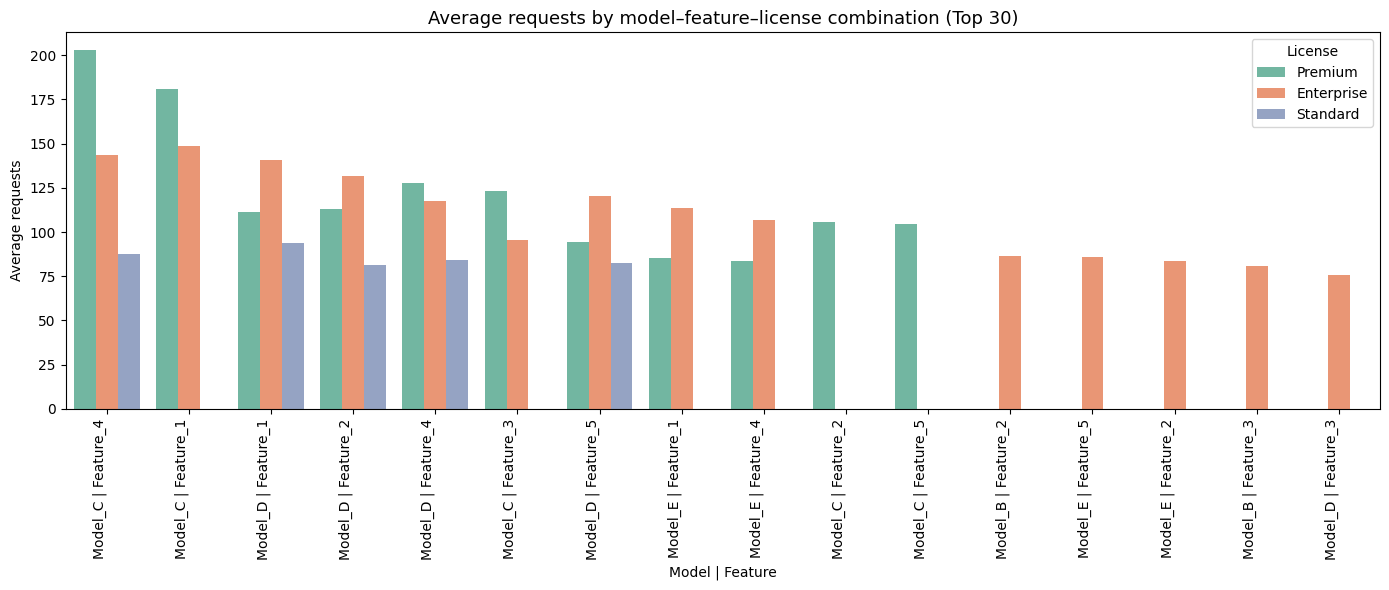

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_sql_query("""
    SELECT 
        model, license, feature,
        AVG(requests_cnt) AS avg_req
    FROM activity
    GROUP BY model, license, feature
    ORDER BY avg_req DESC
    LIMIT 30
""", conn)

data['model_feature'] = data['model'] + ' | ' + data['feature']

plt.figure(figsize=(14,6))
sns.barplot(data=data, x='model_feature', y='avg_req', hue='license', palette='Set2')

plt.title('Average requests by model–feature–license combination (Top 30)', fontsize=13)
plt.xlabel('Model | Feature')
plt.ylabel('Average requests')
plt.xticks(rotation=90, ha='right') 
plt.legend(title='License', loc='upper right')
plt.tight_layout()
plt.show()



In [26]:
pd.read_sql_query("""SELECT 
    model,license,feature,
    COUNT(*) as records,
    SUM(requests_cnt) AS sum_req,
    AVG(requests_cnt) AS avg_req,
    SUM(spent_amount) AS sum_spent,
    AVG(spent_amount) AS avg_spent,
    ROUND(SUM(spent_amount) * 1.0 / SUM(requests_cnt), 4) AS avg_cost_per_request
FROM activity

GROUP BY model,license,feature
ORDER BY records asc
limit 20""", conn)

,model,license,feature,records,sum_req,avg_req,sum_spent,avg_spent,avg_cost_per_request
0,Model_E,Basic,Feature_5,165,4872.0,29.527273,949.84,5.756606,0.1950
1,Model_E,Basic,Feature_4,171,5447.0,31.853801,982.59,5.746140,0.1804
2,Model_E,Premium,Feature_5,172,11524.0,67.000000,2242.98,13.040581,0.1946
3,Model_E,Premium,Feature_4,177,14850.0,83.898305,2679.18,15.136610,0.1804
4,Model_E,Enterprise,Feature_4,182,19491.0,107.093407,3552.44,19.518901,0.1823
5,Model_E,Standard,Feature_4,184,12374.0,67.250000,2396.71,13.025598,0.1937
6,Model_E,Enterprise,Feature_5,186,15936.0,85.677419,3055.53,16.427581,0.1917
7,Model_E,Standard,Feature_5,208,8379.0,40.283654,1639.56,7.882500,0.1957
8,Model_D,Premium,Feature_4,237,30290.0,127.805907,5666.81,23.910591,0.1871
9,Model_D,Premium,Feature_5,244,23024.0,94.360656,4494.90,18.421721,0.1952


### Record Frequency Analysis

The analysis of record counts (`records`) reveals clear usage patterns across model–license–feature combinations.

#### Most Frequent Combinations (Top 20)
The most common entries are dominated by:
- **Model_A** combined with **Basic** or **Standard licenses** and **Feature_1–Feature_3**,  
- followed by **Model_D** and **Model_C** in similar low-tier configurations.  

These combinations represent the most frequently used setups, suggesting that they correspond to default, entry-level, or widely accessible configurations.  
They are used often but likely with shorter or simpler sessions, fitting basic users or standard system functions.

#### Least Frequent Combinations (Bottom 20)
At the opposite end, the least frequent records mostly include:
- **Model_E** and **Model_B**, especially when combined with **Feature_4 or Feature_5**,  
- typically under **Basic**, **Standard**, or **Premium** licenses.  

These setups appear least popular and least active, indicating either specialized or advanced configurations,  
or features with limited applicability in everyday usage.  

**Summary:**  
- High frequency = widespread, simple use (**Model_A**, **Basic/Standard**, **Feature_1–3**)  
- Low frequency = specialized, less-used setups (**Model_E/B**, **Feature_4–5**)  


In [27]:
#stage 4, Aggregating data at daily, weekly, or monthly levels to analyze trends 

In [28]:
pd.read_sql_query("SELECT MIN(day_id), MAX(day_id) FROM activity", conn)


,MIN(day_id),MAX(day_id)
0,2025-03-01,2025-05-31


In [29]:
monthly = pd.read_sql_query("""
SELECT 
    strftime('%Y-%m', day_id) AS month,
    SUM(requests_cnt) AS total_requests,
    SUM(spent_amount) AS total_spent,
    ROUND(SUM(spent_amount)*1.0 / SUM(requests_cnt), 3) AS avg_cost_per_request
FROM activity
GROUP BY month
ORDER BY month
""", conn)
monthly


,month,total_requests,total_spent,avg_cost_per_request
0,2025-03,1668402.0,403473.18,0.242
1,2025-04,2056461.0,494638.82,0.241
2,2025-05,2567188.0,602801.34,0.235


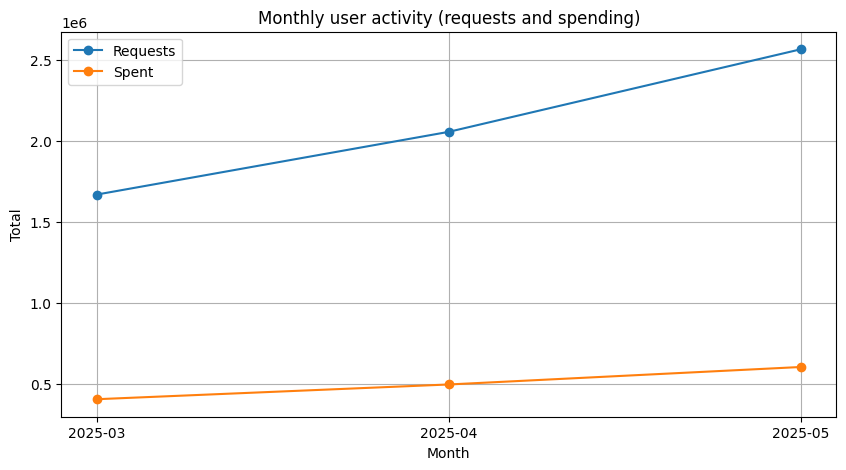

In [30]:
plt.figure(figsize=(10,5))
plt.plot(monthly['month'], monthly['total_requests'], marker='o', label='Requests')
plt.plot(monthly['month'], monthly['total_spent'], marker='o', label='Spent')
plt.title('Monthly user activity (requests and spending)')
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()


### Monthly Activity Summary (March–May 2025)

Both total requests and total spending increased steadily, indicating higher user engagement.  
At the same time, the **average cost per request** slightly decreased (from **0.242 → 0.235**), suggesting improved system efficiency.


In [31]:
weekly = pd.read_sql_query("""
SELECT 
    strftime('%Y-%W', day_id) AS week,
    SUM(requests_cnt) AS total_requests,
    SUM(spent_amount) AS total_spent
FROM activity
GROUP BY week
ORDER BY week
""", conn)
weekly


,week,total_requests,total_spent
0,2025-08,29627.0,6745.54
1,2025-09,374804.0,92386.44
2,2025-10,398361.0,101481.88
3,2025-11,394207.0,95973.88
4,2025-12,396381.0,90452.57
5,2025-13,299585.0,66291.30
6,2025-14,497007.0,115254.86
7,2025-15,542937.0,132796.29
8,2025-16,509269.0,128409.32
9,2025-17,551380.0,130553.67


### Weekly Activity Summary 

From the first to the last week, we can observe a generally **increasing trend** in total requests, with only a few minor declines.  
Overall, the number of requests from the 1 week increased by approximately **182% compared to week 8** and **144% compared to week 2**, confirming a strong upward trajectory in user activity.

As for **total spending**, it likely depends on specific **model–license combinations**, as seen in earlier analyses.  
We will verify this relationship later to check whether spending growth follows the same pattern as request volume.


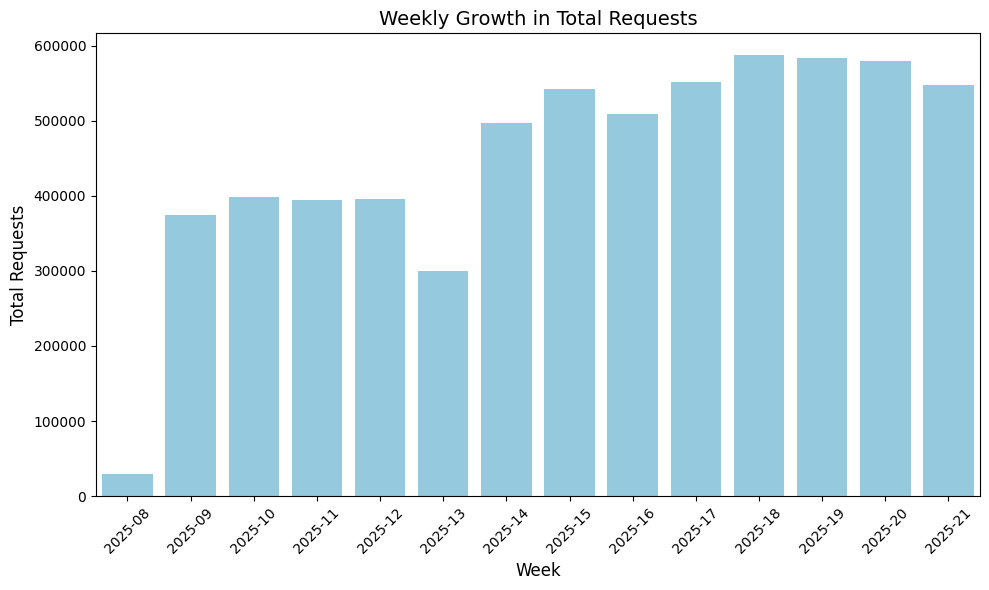

In [32]:
plt.figure(figsize=(10,6))

sns.barplot(x='week', y='total_requests', data=weekly, color='skyblue')

plt.title('Weekly Growth in Total Requests', fontsize=14)
plt.xlabel('Week', fontsize=12)
plt.ylabel('Total Requests', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
daily = pd.read_sql_query("""
SELECT 
    strftime('%w', day_id) AS weekday,
    CASE strftime('%w', day_id)
        WHEN '0' THEN 'Sunday'
        WHEN '1' THEN 'Monday'
        WHEN '2' THEN 'Tuesday'
        WHEN '3' THEN 'Wednesday'
        WHEN '4' THEN 'Thursday'
        WHEN '5' THEN 'Friday'
        WHEN '6' THEN 'Saturday'
    END AS day_name,
    SUM(requests_cnt) AS total_requests,
    SUM(spent_amount) AS total_spent
FROM activity
GROUP BY weekday
ORDER BY weekday
""", conn)
daily


,weekday,day_name,total_requests,total_spent
0,0,Sunday,282316.0,67448.15
1,1,Monday,1124783.0,270643.02
2,2,Tuesday,1145046.0,270659.09
3,3,Wednesday,1101216.0,260980.71
4,4,Thursday,1097254.0,265305.95
5,5,Friday,1186367.0,282391.05
6,6,Saturday,355069.0,83485.37


### Daily Activity Summary

The distribution of total requests across weekdays is relatively stable, with activity levels remaining consistent from Monday to Friday.  
However, there is a **significant drop during weekends**, especially on **Sunday and Saturday**, which is intuitive since these are non-working days for most users.  

This pattern indicates that the system’s peak activity aligns with the standard workweek, suggesting that usage is primarily driven by professional or organizational needs rather than personal use.


In [34]:
pd.read_sql_query("""
WITH monthly AS (
    SELECT 
        strftime('%Y-%m', day_id) AS month,
        model,
        SUM(requests_cnt) AS total_requests
    FROM activity
    GROUP BY month, model
)
SELECT 
    m1.month,
    m1.model AS top_model,
    m1.total_requests AS top_requests,
    m2.model AS lowest_model,
    m2.total_requests AS lowest_requests
FROM monthly m1
JOIN monthly m2 
    ON m1.month = m2.month
WHERE 
    m1.total_requests = (
        SELECT MAX(total_requests)
        FROM monthly 
        WHERE month = m1.month
    )
    AND m2.total_requests = (
        SELECT MIN(total_requests)
        FROM monthly 
        WHERE month = m1.month
    )
ORDER BY m1.month ASC;
""", conn)


,month,top_model,top_requests,lowest_model,lowest_requests
0,2025-03,Model_D,530679.0,Model_B,190634.0
1,2025-04,Model_C,628704.0,Model_E,232351.0
2,2025-05,Model_C,844274.0,Model_E,261921.0


In [35]:
pd.read_sql_query("""
WITH monthly AS (
    SELECT 
        strftime('%Y-%m', day_id) AS month,
        feature,
        SUM(requests_cnt) AS total_requests
    FROM activity
    GROUP BY month, feature
)
SELECT 
    f1.month,
    f1.feature AS top_feature,
    f1.total_requests AS top_requests,
    f2.feature AS lowest_feature,
    f2.total_requests AS lowest_requests
FROM monthly f1
JOIN monthly f2 
    ON f1.month = f2.month
WHERE 
    f1.total_requests = (
        SELECT MAX(total_requests)
        FROM monthly 
        WHERE month = f1.month
    )
    AND f2.total_requests = (
        SELECT MIN(total_requests)
        FROM monthly 
        WHERE month = f1.month
    )
ORDER BY f1.month ASC;
""", conn)



,month,top_feature,top_requests,lowest_feature,lowest_requests
0,2025-03,Feature_1,722320.0,Feature_5,74761.0
1,2025-04,Feature_1,861743.0,Feature_5,104476.0
2,2025-05,Feature_1,1085716.0,Feature_5,126026.0


In [36]:
pd.read_sql_query("""
WITH monthly AS (
    SELECT 
        strftime('%Y-%m', day_id) AS month,
        license,
        SUM(requests_cnt) AS total_requests
    FROM activity
    GROUP BY month, license
)
SELECT 
    l1.month,
    l1.license AS top_license,
    l1.total_requests AS top_requests,
    l2.license AS lowest_license,
    l2.total_requests AS lowest_requests
FROM monthly l1
JOIN monthly l2 
    ON l1.month = l2.month
WHERE 
    l1.total_requests = (
        SELECT MAX(total_requests)
        FROM monthly 
        WHERE month = l1.month
    )
    AND l2.total_requests = (
        SELECT MIN(total_requests)
        FROM monthly 
        WHERE month = l1.month
    )
ORDER BY l1.month ASC;
""", conn)


,month,top_license,top_requests,lowest_license,lowest_requests
0,2025-03,Enterprise,601493.0,Basic,291584.0
1,2025-04,Enterprise,602279.0,Basic,352505.0
2,2025-05,Premium,746885.0,Basic,434034.0


In [37]:
pd.read_sql_query("""
WITH monthly AS (
    SELECT 
        strftime('%Y-%m', day_id) AS month,
        model,
        license,
        feature,
        SUM(requests_cnt) AS total_requests
    FROM activity
    GROUP BY month, model, license, feature
)
SELECT 
    c1.month,
    c1.model || ' - ' || c1.license || ' - ' || c1.feature AS top_combination,
    c1.total_requests AS top_requests,
    c2.model || ' - ' || c2.license || ' - ' || c2.feature AS lowest_combination,
    c2.total_requests AS lowest_requests
FROM monthly c1
JOIN monthly c2 
    ON c1.month = c2.month
WHERE 
    c1.total_requests = (
        SELECT MAX(total_requests)
        FROM monthly 
        WHERE month = c1.month
    )
    AND c2.total_requests = (
        SELECT MIN(total_requests)
        FROM monthly 
        WHERE month = c1.month
    )
ORDER BY c1.month ASC;
""", conn)


,month,top_combination,top_requests,lowest_combination,lowest_requests
0,2025-03,Model_D - Enterprise - Feature_1,84222.0,Model_B - Basic - Feature_4,689.0
1,2025-04,Model_C - Premium - Feature_1,113922.0,Model_B - Basic - Feature_4,495.0
2,2025-05,Model_C - Premium - Feature_1,148997.0,Model_B - Standard - Feature_4,1126.0


### 📊 Monthly Trends Summary

**1️⃣ Model trends:**  
In March, **Model D** recorded the highest number of requests (≈ 530 K), while **Model B** had the lowest (≈ 190 K).  
Starting from April, **Model C** took the lead and maintained dominance through May, growing steadily from ≈ 629 K to ≈ 844 K requests.  
**Model E** consistently remained the weakest performer, indicating a clear downward bias in its overall usage.  

**2️⃣ Feature trends:**  
Across all months, **Feature 1** was the most frequently used by a wide margin, showing continuous growth (from ≈ 722 K to ≈ 1.08 M requests).  
At the same time, **Feature 5** remained the least used, suggesting it serves a narrower or more specialized role within the system.  

**3️⃣ License trends:**  
During March and April, **Enterprise** licenses dominated total activity, but in May, **Premium** took over with ≈ 747 K requests.  
Conversely, **Basic** consistently ranked lowest in all periods, confirming its association with limited functionality or smaller-scale users.  

**4️⃣ Combined model + license + feature trends:**  
In March, the top-performing trio was **Model D – Enterprise – Feature 1**, followed by **Model C – Premium – Feature 1**, which took and maintained the l


## Final Summary — step by step (what we did and key takeaways)

Below is a coherent record of the entire analysis by stages: **what we did** and **the main findings** at each step. Ready to paste into your report/notebook.

---

### STAGE 1 — Data load and initial EDA
**What we did:**
- Loaded data (SQL + Pandas), ran `head/shape/info`.
- Checked duplicates and nulls — **none found**.
- Identified fields: `model`, `license`, `feature`, `requests_cnt`, `spent_amount`, `timestamp/day_id`.

**Takeaways:**
- Dataset contains **5 models** (A, B, C, D, E); **4 licenses** (Basic, Standard, Premium, Enterprise); **5 features** (Feature_1–Feature_5).
- Core metrics for analysis: **records**, **sum_req**, **avg_req**, **sum_spent**, **avg_spent**, **avg_cost_per_request**.

---

### STAGE 2 — Models (Model_A … Model_E)
**What we did:**
- Aggregations per model: `records`, `sum_req`, `avg_req`, `sum_spent`, `avg_spent`, `avg_cost_per_request`.
- Rankings (TOP/BOTTOM) and comparisons.

**Key findings:**
- **C and D**: highest `sum_req` (1.9M each) and **lowest cost per request** (0.19) → **most efficient**.
- **A**: most frequent in records, but **lowest `avg_req`** (26) and **highest unit cost** (0.37) → **least efficient**.
- **B vs E**: similar `sum_req`, but **E** appears 2 times less  and delivers **more requests per occurrence** (higher `avg_req`) → better intensity at similar cost. **B** is also 2 times less expensive.

---

### STAGE 3 — Licenses (Basic, Standard, Premium, Enterprise)
**What we did:**
- Aggregations per license (same metrics as above).
- Compared `records`, `sum_req`, `avg_req`, `avg_cost_per_request`.

**Key findings:**
- **Basic/Standard**: highest **records** (often-used setups), but **lower intensity** (`avg_req`).
- **Premium/Enterprise**: **fewer records**, but **notably higher `avg_req`** (longer/heavier sessions).
- **Unit cost does not differ across licenses** — **price depends on the model**, not the license.

---

### STAGE 4 — Features (Feature_1 … Feature_5)
**What we did:**
- Aggregations per feature, TOP/BOTTOM rankings, comparisons of `records`, `sum_req`, `avg_req`, and cost.

**Key findings:**
- **Feature_1, Feature_2, Feature_3**: dominate both **records** and **sum_req**.
- **Feature_4**: used rarely (low `records`), but **high `avg_req`** → fewer, yet **long/intense** sessions.
- **Feature_5**: **least popular** and least active overall.
- **Unit cost is not feature-driven** (consistent with “price depends only on model”).

---

### STAGE 5 — Pairwise combinations (2D)
**What we did:**
- `model + license`, `model + feature`, `license + feature`: aggregations and sorts by `records`, `sum_req`, `avg_req`.

**Key comparative findings:**
- **Regardless of license, models C and D** dominate in `sum_req`.
- **Regardless of model, Basic/Standard** dominate in **records** (frequency), but not in `sum_req`.
- **Model + Feature**: combos with **Feature_1/2** and **Model_C/D** deliver the highest `sum_req`; combos with **Feature_4/5** (esp. with **A/B/E**) sit at the bottom.

---

### STAGE 5 — Triple combinations (Model + License + Feature)
**What we did:**
- Full 3D aggregation; TOP/BOTTOM rankings for `records`, `sum_req`, `avg_req`; pinpointed best/worst configurations.

**Detailed findings (best/worst):**
- **Most common (records)**: **Model A + Standard + Feature 3** — typical/“default” configuration for frequent short uses.
- **Rarest (records)**: **Model E + Basic + Feature 4** — niche, low-attractiveness setup.
- **Highest `sum_req` (most used overall)**: **Model C + Enterprise + Feature 1** — high-end segment with the largest volume.
- **Lowest `sum_req` (least used overall)**: **Model B + Basic + Feature 5** — minimal activity, low functional appeal.
- **Highest `avg_req` (most intense sessions)**: **Model D + Enterprise + Feature 2** — less frequent but **very long**/intense usage when it occurs.
- **Lowest `avg_req` (least intense sessions)**: **Model A + Basic + Feature 5** — short/light interactions.

---

### STAGE 5B — Time trends (months, weeks, weekdays)
**What we did:**
- Monthly (`%Y-%m`), weekly (`%Y-%W`), and weekday aggregations.
- Selected **TOP and LOWEST per month** (model/feature/license/combination).
- Plots: bars/lines (requests & spend), weekday vs weekend.

**Key findings:**
- **Upward trend** in activity from the first to the last week (last week ≈ **+182%** vs first).
- **Peak** weekly activity around weeks ~17–20; monthly peak in **Apr–May**.
- **Weekdays ≫ weekends** (Sat/Sun lowest) — consistent with work-cycle usage.
- **Monthly dominance**: March → **Model D** on top; from April to May → **Model C** takes the lead.
- **Feature_1** remains the leader across months; **Feature_5** stays lowest throughout.

---

### STAGE 6 — Efficiency & cost
**What we did:**
- Compared `avg_cost_per_request` across model/license/feature.
- Juxtaposed `avg_cost_per_request` with `avg_req` and `sum_req`.

**Key findings:**
- **Price (avg_cost_per_request) depends only on the model** (not on license or feature).  
  - **Most expensive**: Model A (~0.37).  
  - **Lowest/most efficient**: Models C and D (~0.19).
- **Premium/Enterprise** → higher intensity (`avg_req`), yet **stable unit cost** (because cost is model-driven).
- **Most valuable combos** pair **Model C/D + Feature_1/2** with higher-tier licenses.

---

## Final one-paragraph takeaway
Across the entire study, **Models C and D** are the pillars of performance (high `sum_req`, low `avg_cost_per_request`), **Feature_1/2** drive the largest volumes, and **Premium/Enterprise** are linked with longer/heavier sessions. **Model A** is recorded most often but has the lowest `avg_req` and the highest unit cost — it is **least efficient**. **Unit price depends solely on the model**, as shown by near-identical costs within license/feature groups. Time trends show a **steady upward trajectory** and a typical weekly cycle (Mon–Fri ≫ weekend). In combinations: **C + Enterprise + Feature_1** yields the highest `sum_req`, **A + Standard + Feature_3** is most common by records, and **B + Basic + Feature_5** is the weakest in both volume and intensity.
